<a href="https://colab.research.google.com/github/lkivumbi/Prediction-of-product-sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of product sales
- Author: Luke Kivumbi

## Project Overview

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

##Loading Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#loading data
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#DATA DICTIONARY

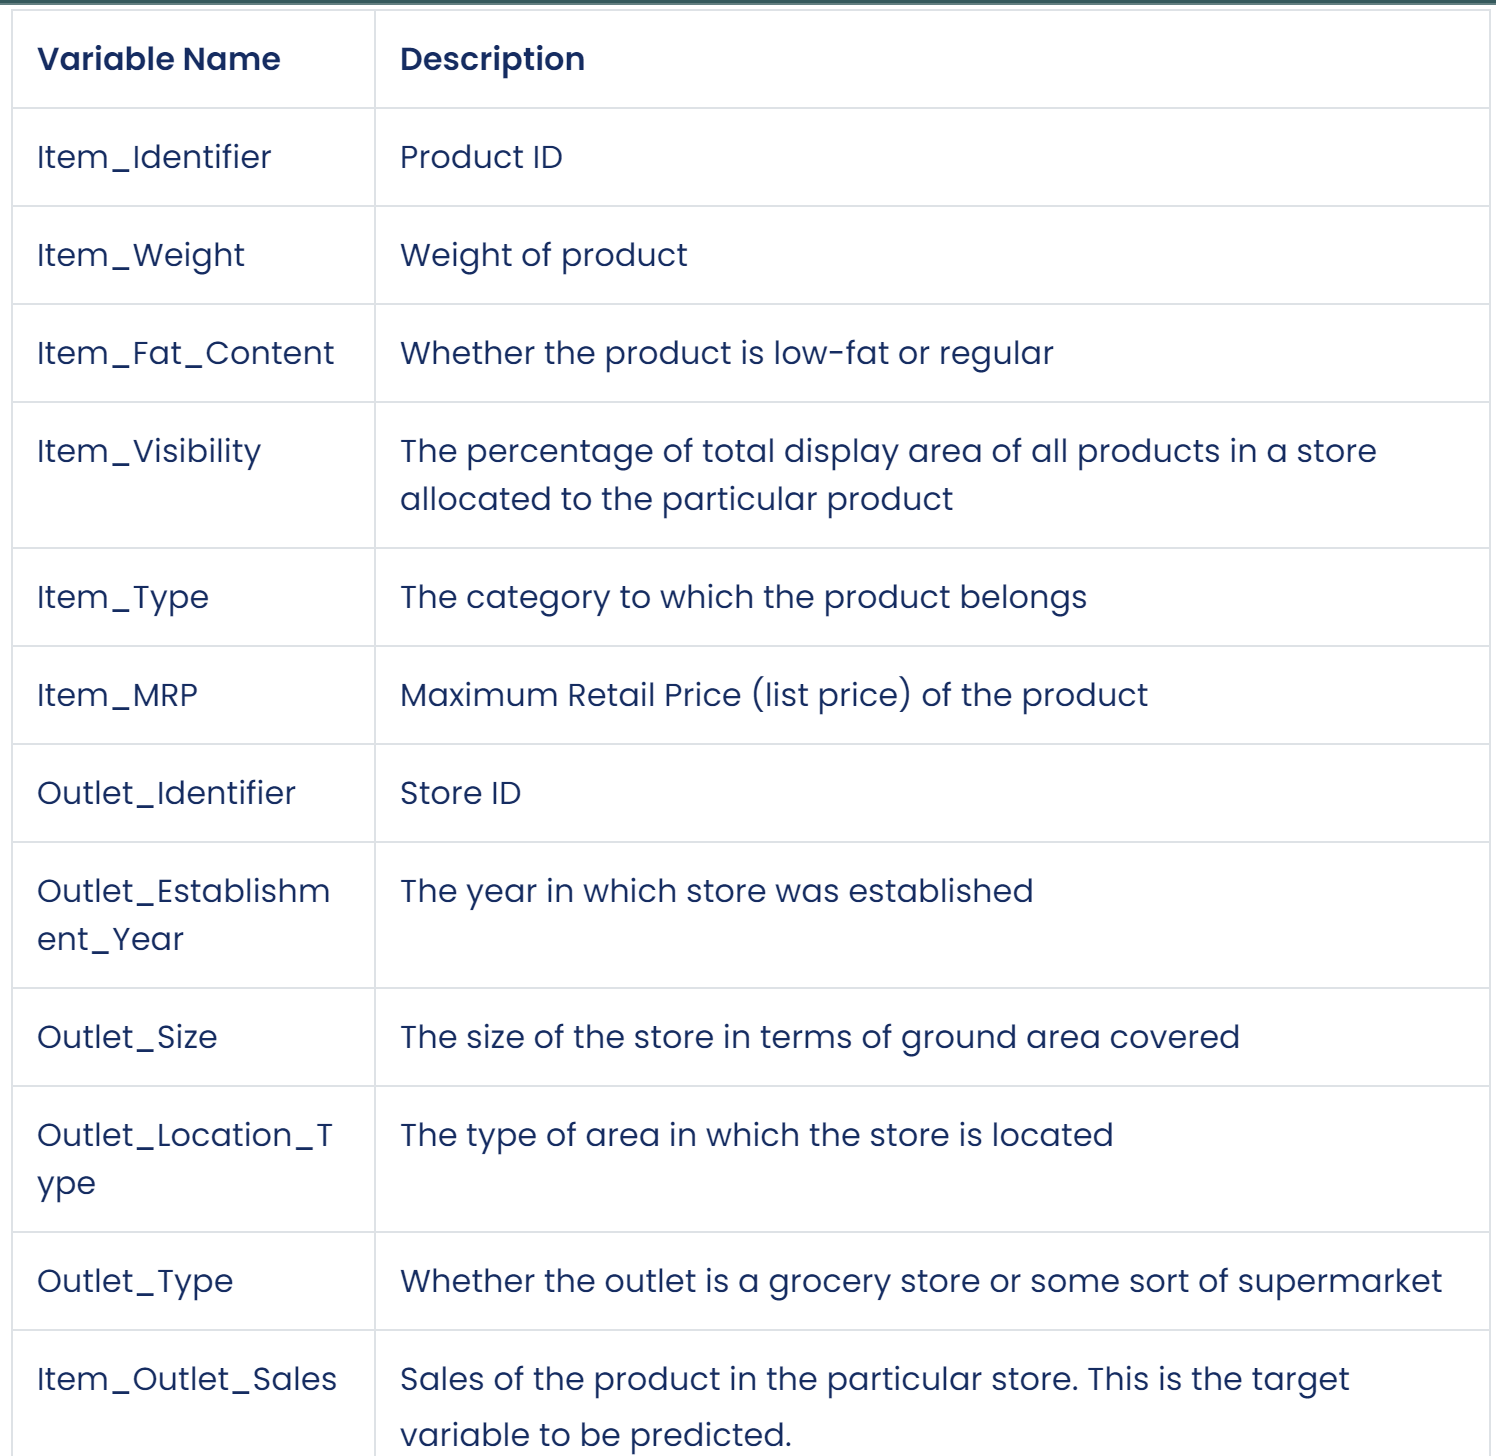

## Clean Data


##Data Cleaning

In [10]:
df.shape

(8523, 12)

Dataset has 8523 rows and 12 columns

Finding datatypes of each variable

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Finding Duplicates

In [12]:
df.duplicated().sum()

0

the dataset has not duplicates

Are there any missing values?

In [13]:
#finding missing values or null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

two columns appear to have missing values
- Item_weight
- Outlet_size

Item_weight is a float while Outlet_size is a string

In [14]:
#addressing item weight first
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [15]:
#finding mean of series
df['Item_Weight'].mean().round(2)

12.86

In [16]:
df['Item_Weight'] = df['Item_Weight'].fillna('MISSING')
df['Item_Weight'].value_counts()

MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

Dealing with Outlet_Size

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
#filling with Missing for missing values
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [19]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

finding inconsistent objects

In [20]:
string_cols_list = df.select_dtypes('object').columns
string_cols_list

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [21]:
df[string_cols_list].value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            11.6         LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            16.1         Regular           Frozen Foods           OUT010             Missing      Tier 3                Grocery Store        1
FDV32            7.785        Low Fat           Fruits and Vegetables  OUT049             Medium       Tier 1                Supermarket Type1    1
                                                                       OUT035             Small        Tier 2                Supermarket Type1    1
                                                                       OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                     

Item_Fat_Content column appears to have inconsistent values

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
#replacing inconsistent values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular','low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For numerical columns

In [24]:
num_cols_list = df.select_dtypes('number').columns
num_cols_list

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [25]:
#droping Item_Type and outlet est year
df = df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


fixing new index

In [26]:
df=df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

## Feature Inspection

##NUMERICAL FEATURE DATA VISUALS

In [27]:
#identifying numeric columns in our dataset
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

Text(0.5, 1.0, 'Histoplot of Item Visibility')

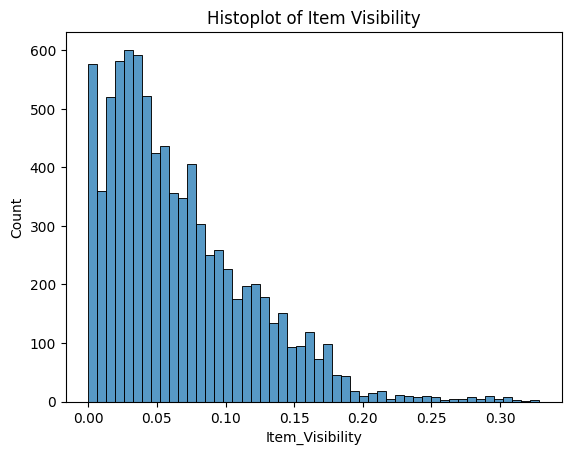

In [28]:
#analyzing the effects of Item visibility
ax = sns.histplot(data=df, x= 'Item_Visibility')
ax.set_title('Histoplot of Item Visibility')

Most Items are not well displayed.



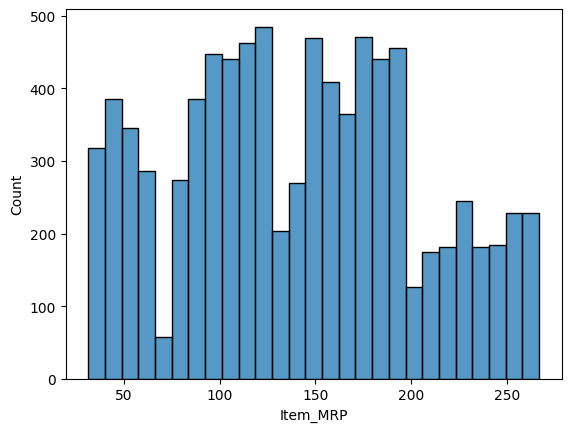

In [29]:
#Item mrp
ax = sns.histplot(data=df, x='Item_MRP')

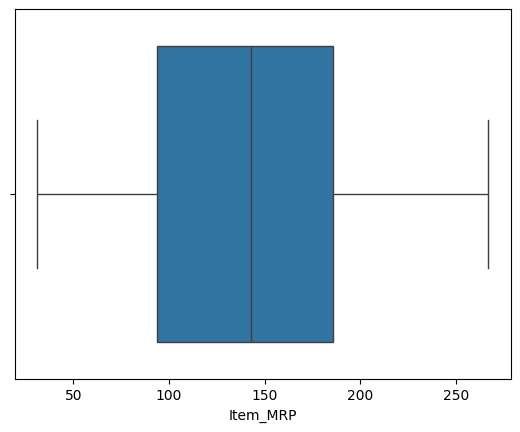

In [30]:
#boxplot of Item mrp
ax = sns.boxplot(data=df, x='Item_MRP')

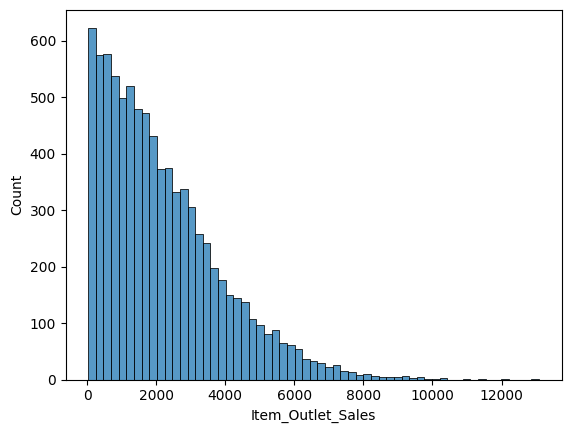

In [31]:
#visualising Item outlet sales
ax = sns.histplot(data=df, x='Item_Outlet_Sales')

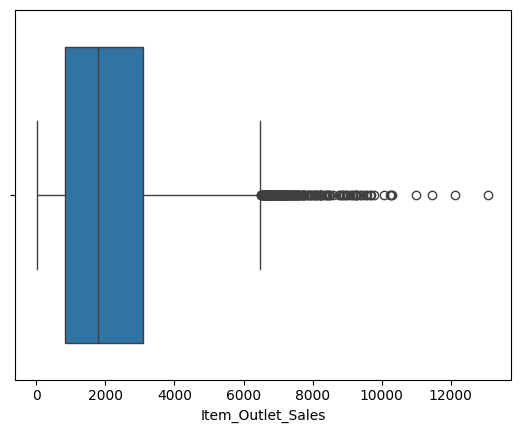

In [32]:
#boxplot of Item_Outlet_Sales
ax = sns.boxplot(data=df,x='Item_Outlet_Sales')

##Categorical features

In [33]:
string_cols_list

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [36]:
df.select_dtypes('object').nunique()

Item_Weight             416
Item_Fat_Content          2
Item_Type                16
Outlet_Identifier        10
Outlet_Size               4
Outlet_Location_Type      3
Outlet_Type               4
dtype: int64

<ipython-input-46-60e2f573575a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


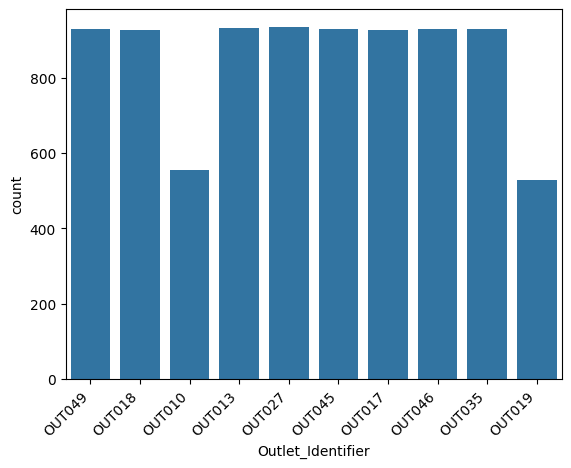

In [46]:
#countplot of Outlet_Identifier
ax = sns.countplot(data=df,x='Outlet_Identifier');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-45-d183d3e7c3d6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


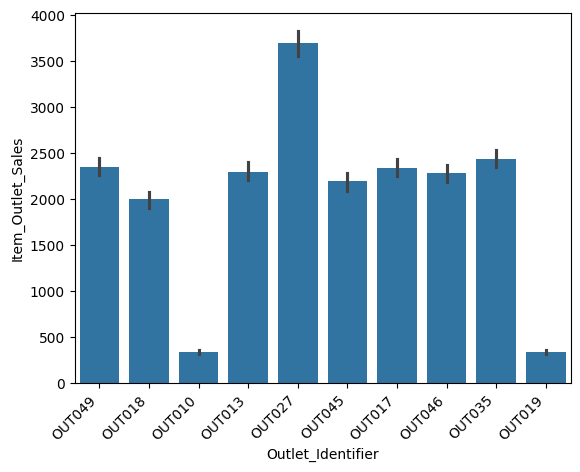

In [45]:
#barplot of outlet identifier on item outlet sales
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-55-7641f57aed46>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


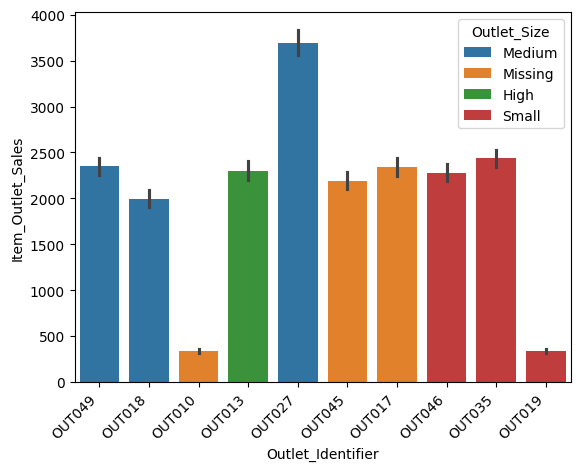

In [55]:
#barpolot of Outlet Identifier colored according to outlet Size
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Size')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

Outlet27 seems to be bringing in the most item sales

<ipython-input-51-07fef64ef05e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


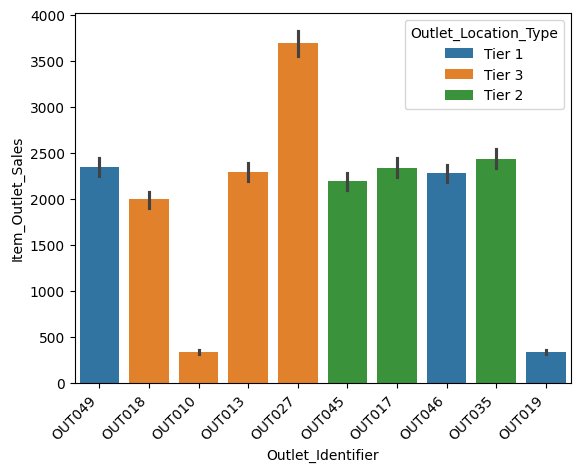

In [51]:
#barpolot of item identifier colored according to outlet location
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Location_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-52-a51ffa083299>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


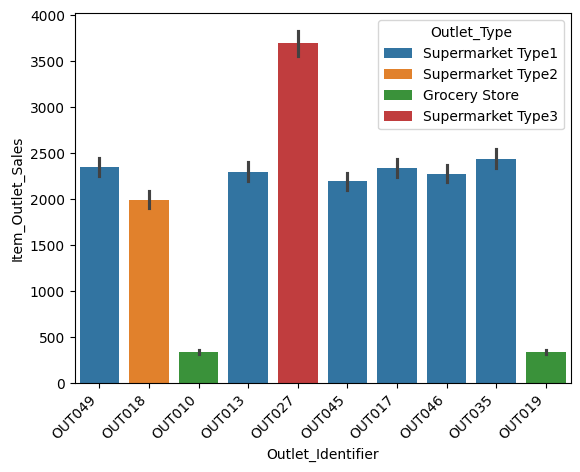

In [52]:
#barpolot of item identifier colored according to outlet location
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-54-015330ac93c8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


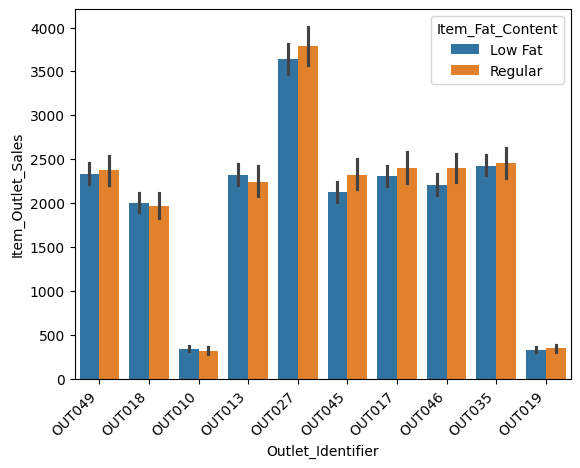

In [54]:
#barpolot of item Outlet Identifier colored according to Item Fat Content
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

Looks like stores sell items with both regular and low fat content in almost the same amounts with those with regular fat slightly egding those with low fat

**which item would be bringing in the most sales**

<ipython-input-48-eedacc40c679>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


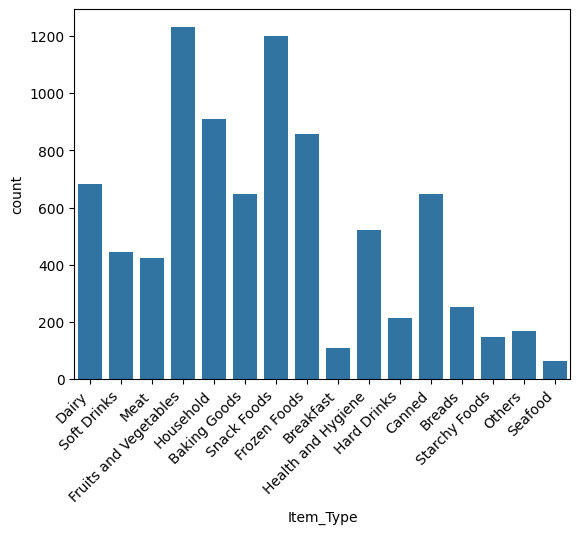

In [48]:
#countplot of item type
ax = sns.countplot(data=df,x='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

most common items are fruits and vegetables and snack foods

<ipython-input-53-9bac184005ad>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


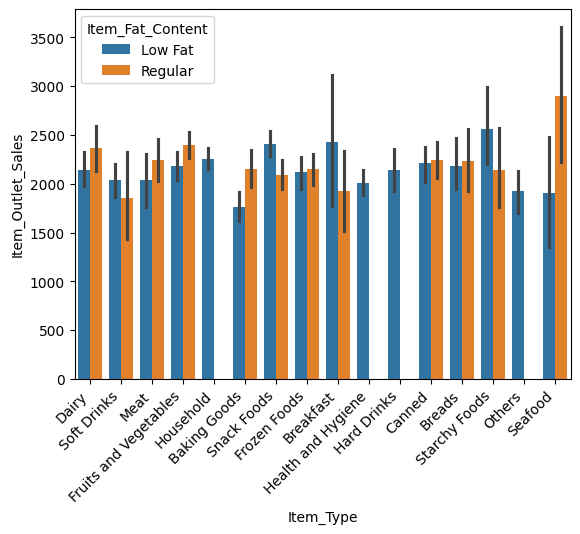

In [53]:
#barpolot of item type colored according to item fat content
ax = sns.barplot(data=df,x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

##HEATMAP OF THE DATAFRAME

In [56]:
corr_sales_pred = df.corr(numeric_only=True)
corr_sales_pred.round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.13
Item_MRP,-0.00,1.00,0.57
Item_Outlet_Sales,-0.13,0.57,1.00


<Axes: >

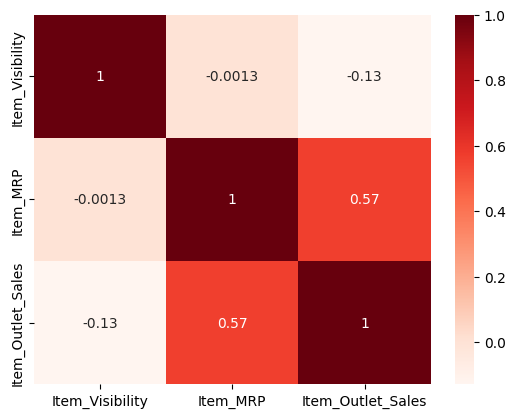

In [60]:
sns.heatmap(corr_sales_pred,cmap='Reds',annot=True)

Item maximum retail price seems to be fairly positively correlated to the item outlet sales